# <div align="center">Discover, Measure, and Mitigate Bias in a Dataset

The idea of fairness within AI comes from the idea that not all data is created equal, whether it’s measuring human populations or words in a document. If an AI algorithm is measuring the potential risk within a contract or agreement, such as a loan approval,  the context matters. Fairness in a legal setting is measuring whether a public policy is being applied equally across different races, genders, ethnicities and so forth. Fairness in AI means planning for these differences in data to make the end result representative of the goal that developers are actually trying to have the AI process tackle. In assessing human and civil rights and individual and societal harms from AI systems, research indicates that many forms of bias occur at the data collection stage. As a result, practices and methods to introduce fairness metrics into AI development can identify unprivileged attributes and measure bias. Then, techniques can be introduced to mitigate bias and find fairness in the dataset.  Using applied ethical practices of fairness in AI processes can mitigate harms from bias and produce a more complete end product from the AI processes. 

## Assignment Instructions 
The three sections of this tutorial will guide you through steps to illustrate how bias in loan data can be discovered, measured, and mitigated using code techiques and metrics. The  data comes from a hypothetical loan processing dataset. The techniques in this tutorial can be used to discover biased subgroups, determine the amount of bias, and mitigate this bias.
<strong> Complete the tutorial steps in each section, and respond to the indicated questions </strong>

<a href='#explore_dataset'>Part 1 DISCOVER IMBALANCE</a>
 1. Import necessary libraries. 
 2. Load the loan approval dataset. 
 3. Explore the dataset characteristics to identify biased subgroups.<br>

<strong>Respond to prompt: Q1</strong>

<a href='#measure_bias'>Part 2 MEASURE BIAS</a><p></p>

1. Statistical Parity
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact

<strong>Respond to prompts: Q2, Q3, Q4</strong>

<a href='#logistic_regression'>Part 3 MITIGATE BIAS</a><p></p>

1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting 
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

<strong>Respond to prompts: Q5, Q6, Q7, Q8, Q9 and Q10</strong>

***

# Part 1 DISCOVER IMBALANCE <a id='explore_data'></a>

#### Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Load the dataset

In [4]:
#read data
data = pd.read_csvdata = pd.read_csv('loan_approval_biased.csv')

# Clone the dataset 
data_clone = data.copy()

In [5]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360,360,0,Rural,Y
1,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490,180,1,Urban,Y
2,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
3,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120,360,1,Semiurban,Y
4,LP002422,Male,No,1,Graduate,No,37719,0.0,152,360,1,Semiurban,Y


In [6]:
data_clone.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002949,Female,No,3+,Graduate,No,416,41667.0,350,180,1,Urban,N
610,LP002717,Male,Yes,0,Graduate,No,1025,5500.0,216,360,0,Rural,N
611,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110,360,1,Urban,N
612,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135,360,1,Rural,N
613,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98,360,1,Semiurban,N


Review the column headers and attributes.

In [7]:
print(data_clone.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  156.050489        334.866450   
std        6109.041673        2926.248369   99.128597         79.599764   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  175.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.812704  
std          0.390467  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<br>

In [8]:
# Count the number of males and females in the dataset
gender_counts = data_clone['Gender'].value_counts()

# Print the counts
print("Counts of each gender in the dataset")
print(gender_counts)

Counts of each gender in the dataset
Gender
Male      497
Female    117
Name: count, dtype: int64


In [9]:
# Create a label encoder object
le = LabelEncoder()

# List of columns to be label encoded
label_encoded_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding to each column of the cloned DataFrame
for col in label_encoded_columns:
    data_clone[col] = le.fit_transform(data_clone[col])


In [10]:
data_clone['Dependents'] = data_clone['Dependents'].replace('3+', 3) 

In [11]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,1,1,3,0,0,81000,0.0,360,360,0,0,1
1,LP002101,1,1,0,0,0,63337,0.0,490,180,1,2,1
2,LP001536,1,1,3,0,0,39999,0.0,600,180,0,1,1
3,LP001640,1,1,0,0,1,39147,4750.0,120,360,1,1,1
4,LP002422,1,0,1,0,0,37719,0.0,152,360,1,1,1


#### Determine the loan approval rates by gender. (0 = Female, 1 = Male)

In [12]:
# Filter for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Count the number of approved loans for each gender
gender_approval_counts = approved_loans['Gender'].value_counts()

print(gender_approval_counts)

Gender
1    217
0      2
Name: count, dtype: int64


#### Create Correlation Heatmap to examine data for bias

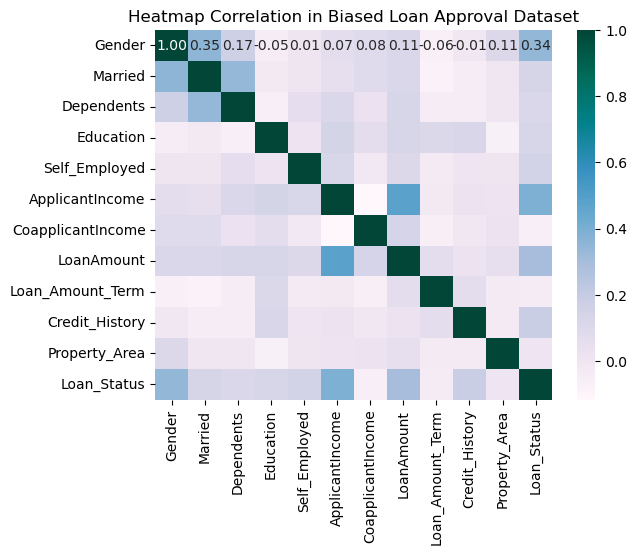

In [13]:
eda_data = data.copy()

# Convert 'Gender' to numeric for visualization purposes only
# **Be mindful when converting "F" and "M" to 0 and 1. Converting gender to a binary can oversimplify a
# multidimensional aspect of human identity, could potentially reinforce stereotypes, and create a 
# hierarcy.**

eda_data['Gender'] = eda_data['Gender'].map({'Female': 0, 'Male': 1})

# convert for heatmap
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {"No" : 0,"Yes" : 1}
dependents_stat = {"0":0,"1":1,"2":2,"3+":3}
education_stat = {"Not Graduate" : 0, "Graduate" : 1}
property_stat = {"Semiurban" : 0, "Urban" : 1,"Rural" : 2}
status_stat = {"N" : 0, "Y" : 1}

eda_data["Gender"] = eda_data["Gender"].replace(gender_stat)
eda_data["Married"] = eda_data["Married"].replace(yes_no_stat)
eda_data["Dependents"] = eda_data["Dependents"].replace(dependents_stat)
eda_data["Education"] = eda_data["Education"].replace(education_stat)
eda_data["Self_Employed"] = eda_data["Self_Employed"].replace(yes_no_stat)
eda_data["Property_Area"] = eda_data["Property_Area"].replace(property_stat)
eda_data["Loan_Status"] = eda_data["Loan_Status"].replace(status_stat)

sns.heatmap(eda_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="PuBuGn")
plt.title("Heatmap Correlation in Biased Loan Approval Dataset")
plt.show()

***

### Q1 Based on the Correlation Heatmap, which observations can you make?
<p><font color='blue'>Graded cell &#9658;</font></p>

Response: `Based off of the graded cell there are certian factors that are more likely to have individuals who are more likely to get approved for a loan based off of a couple key factors. For instance looking at the applicant income and their loan amount, has a very high correlation to eachother. Along with the Gender and their loan status. It seems to me that their is some kind of bias with demographic information as well. `



***

# PART 2: MEASURE THE BIAS <a id='measure_bias'></a>

In Part 2 you will examine four methods to measure bias in a dataset. 

1. Statistial Parity  
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact 


### Statistical Parity

Statistical parity is the concept where a particular outcome or benefit is equally distributed across all groups in a population.  Simply put, it is a measurement of the difference in probabilities of a positive outcome across two groups. In an ideal and fair world, a statistical parity of 0 would be seen as ideal as it would indicate that there is no disparity in outcomes.

In [14]:
# Filter the dataset for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Calculate the counts of approved loans for each gender
approved_counts = approved_loans['Gender'].value_counts()


In [15]:
#calculate the total counts for each gender
gender_counts = data_clone['Gender'].value_counts()
print(gender_counts)

# Now, calculate the approval rates
approval_rate_male = approved_counts[1] / gender_counts[1]  # 1 is Male
approval_rate_female = approved_counts[0] / gender_counts[0]  # 0 is Female

# Print the approval rates
print(f"Loan Approval Rate for Males: {approval_rate_male:.2f}")
print(f"Loan Approval Rate for Females: {approval_rate_female:.2f}")

# Compare the rates to check for statistical parity
parity_difference = abs(approval_rate_male - approval_rate_female)
print(f"Difference in Approval Rates: {parity_difference:.2f}")


Gender
1    497
0    117
Name: count, dtype: int64
Loan Approval Rate for Males: 0.44
Loan Approval Rate for Females: 0.02
Difference in Approval Rates: 0.42


### Odds Ratio

The odds ratio is a measure of association between an exposure and an outcome. In the context of loan approvals for this dataset, it would be the ratio of the odds of a loan being approved for females to the odds of a loan being approved for males.

The odds of approval are calculated as the ratio of loans approved to those not approved. For instance, if 20 loans are approved and 80 are not, the odds of approval would be 20/80 or 0.25.

To calculate the odds ratio (OR):

OR = Odds Female / Odds Male
 
If OR > 1, it implies higher odds of approval for females; OR < 1 implies lower odds of approval for females compared to males.

In [16]:
# calculate odds for each gender
odds_female = data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean())
odds_male = data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean())

# Calculate Odds Ratio
odds_ratio = odds_female / odds_male

# Print results
print(f"Odds Ratio: {odds_ratio}")

Odds Ratio: 0.022440392706872377


### Equal Opportunity Difference (EOD)

Equal opportunity difference is a fairness metric that measures the difference in the true positive rates (sensitivity) between two groups. In this dataset, it is the difference in the rate at which loans are correctly approved for females and males.

To calculate equal opportunity difference (EOD):

EOD = TPRfemale - TPRmale 

Here, TPR (True Positive Rate) is the proportion of actual positives that are correctly identified as such (e.g., the proportion of qualified loan applicants who are correctly approved).

If EOD is zero, there is no disparity in approval rates between genders; if EOD is positive, females have a higher rate of correct approval; if EOD is negative, males have a higher rate of correct approval.

In [17]:

# Calculate True Positive Rates for each gender
tpr_female = data_clone[(data_clone['Gender'] == 0) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 0].shape[0]
tpr_male = data_clone[(data_clone['Gender'] == 1) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 1].shape[0]

# Calculate Equal Opportunity Difference
equal_opportunity_difference = tpr_female - tpr_male

# Print results
print(f"Equal Opportunity Difference: {equal_opportunity_difference}")

Equal Opportunity Difference: -0.41952570121584204


## Disparate Impact


Disparate impact refers to a concept used primarily in employment and anti-discrimination law, though it also applies to other areas such as housing and lending. It occurs when a seemingly neutral policy, criterion, or practice has a disproportionately negative effect on a specific group of people, particularly when that group is defined by characteristics such as race, gender, age, or disability, even when there is no intential discrimination.


#### Loan_Approval Disparate Impact (DI) in Females
The industry standard for determining disparate impact in loan approvals often revolves around  a rule know as the 80% rule, or four-fifths rule. (This guideline is used in the United States by the Equal Employment Opportunity Commission and is often referenced in other areas such as lending practices under fair lending laws.)

*Important to note that is a guideline, not a law in lending.

#### Initial Approval Rates by Gender 

In [18]:
# Calculate initial approval rates by gender
approval_rates = data_clone.groupby('Gender')['Loan_Status'].mean()

# Print initial approval rates
print("Initial Approval Rates by Gender:Female = 0, Male = 1")
print(approval_rates)

Initial Approval Rates by Gender:Female = 0, Male = 1
Gender
0    0.017094
1    0.436620
Name: Loan_Status, dtype: float64


In [19]:
# Calculate initial disparate impact

#approval rates of females / approval rates of males
initial_di = approval_rates[0] / approval_rates[1]

print("Initial Disparate Impact")
print(initial_di)

Initial Disparate Impact
0.03915081334436174


### Q2 After examining the results of the statistical parity, the odds ratio, the equal opportunity distance, and the disparate impact, what can you conclude from the data?
<p>Graded cell &#9658;</p>

<font color="blue">Response: 

<font color="orange">ODDS Ratio:

I think that the odds ratio is showing that men are more likely to get approved for loans. It shows the disparity between the two genders, and shows that their is some reason that men are being approved for loans more frequently. Which is letting us now that their is one reason why women arent getting approved as much for loans. 

<font color="cyan">Equal Opportunity Difference (EOD): 

When looking at the stats that were printed from the EOD code block, there is suggesting that the bias is leaning more towards men. Even though that we already knew that the data set was already favoring men to be approved for a loan, it is another reasuring test that the data is leaning one way. 

<font color="rainbow">Disparate Impact: Since the difference in men was in fact so large, there are many things to consider when mens approval rate was in fact much higher than the womens approval rate. With that being said, we should also take into acount the 80% rule, which is looking at how far away the stats are from 80%, and the overall stat is sitting at 4.1% which is very far off from the 80%, which shows that there is a very clear distinction in which men and women are approved for loans. 





### Q3. Which types of potential bias can you identify in this loan approval dataset? Provide specific examples and explain how the bias you identified is reflected in the data.
<p>Graded cell &#9658;</p>

<font color="blue">Response: From all of the stats we have ran so far, we can tell that men are more likely to be appproved for a loan. I think that there are lots of biases in the data set, which the statistics dont lie in this case. But I would like to see an expansion on the data set, which shows some more demographic data, and some more financial statements. Because while yes, the data set is showing a very clear bias towards men, I would like to know a little bit more on why women were not approved at the same rate as men. Digging into the potnetiall reasoning such as Debt to income ratios, outstanding balances, partner incomes, before I would be able to 100% conclude that the data set is bias. The Current state, the data set favors men, over women. 






### Q4. If unaddressed, how can the biases you identified affect: a.) individuals, b.) enterprises, and c.) society?
<p>Graded cells &#9658;</p>


<font color="blue">Response:[Individuals] 

I think that individuals can be effected by this because, what if they do have great credit scores, and they are very responsible with their income, and they get a sexist loan appraiser, who will just deny them soley based off of their gender. The mental impact here is not great, and I think that that there are lots of mental health problems that can arrise from this.

<font color="blue">Response:[Organizations]

Organizations can very easily land themselves in hot water if there is a investiagtion about loan biases. I think that there could be very large fines from the federal government if the loan bias has been found out. With that being said, the company could also very well be loosing income because the people who are approving the loans are deciding not to give good applicants loans because they are just women. 

<font color="blue">Response:[Society] 

In the sense of people being denied the right to purchase homes soley based off of their gender even if they are an extremely good applicant is wrong, and for people who are younger like me who one day hope to own a home, it would feel like the banks are only selling homes to established old people who are buying their third home in their life. 

***

# Part 3 MITIGATE THE BIAS <a id='logistic_regression'></a>

In this portion of the assignment, you will assess the impact of re-weighting, generating synthetic samples (with SMOTE), and a combining re-weighting and synthetic samples on a logistic regression. You will then assess performance and the trade-offs through comparison of their evaluation metrics.
***
1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

### Run a Baseline Logistic Regression on the Unbalanced / Biased Data

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
# Define your features (X) and target variable (y)
X = data_clone.drop(['Loan_ID', 'Loan_Status'], axis=1)  
y = data_clone['Loan_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Train a logistic regression model on the original data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        75
           1       0.85      0.73      0.79        48

    accuracy                           0.85       123
   macro avg       0.85      0.82      0.83       123
weighted avg       0.85      0.85      0.84       123



### Run a Logistic Regression with Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [28]:

#Approval Rate for Females before re-weighting = 1.7094%
#Approval Rate for Males before re-weighting = 43.6620%

#DI equation: Pr(Y=1 | D=unprivileged) / Pr(Y=1 | D=privileged)

#plugging the numbers in ---> new weight for females = (0.8 * 43.6620%) / 1.7094  ≈ 20.5


# Define the class weights for re-weighting
# It could potentially be worthwhile to try different weights
class_weights = {0: 20.5, 1: 1}  # (Re-weight females)

# Create the logistic regression model with class weights

logreg_reweight = LogisticRegression(max_iter=10000, class_weight=class_weights)
logreg_reweight.fit(X_train, y_train)

# eval 
y_pred_reweight = logreg_reweight.predict(X_test)
print(classification_report(y_test, y_pred_reweight))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82        75
           1       1.00      0.33      0.50        48

    accuracy                           0.74       123
   macro avg       0.85      0.67      0.66       123
weighted avg       0.82      0.74      0.70       123



# Generate Synthetic Samples with SMOTE

### Using SMOTE to generate synthetic samples from the minority class (females) to help balance the data.
    

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method to balance datasets. It works by creating synthetic samples from the minority class (in this case, 'Female' if we consider 'Gender' for minority oversampling, or 'N' for 'Loan_Status' if we are considering the outcome) instead of creating copies. This is done by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

1.) Before applying SMOTE, the dataset should be split into training and testing sets.

2.) SMOTE should only be applied to the training set.(SMOTE generates synthetic samples based on the existing minority 
    class in the data applying it to your test set would introduce synthetic data into the set that you'll use for 
    validation, which can lead to overly inflated performance estimates.)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Apply SMOTE to the training data only!
smote = SMOTE(random_state=531)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Run a Logistic Regression with SMOTE 

<p><font color='blue'>Graded cell &#9658;</font></p>

In [31]:
# Train a logistic regression model on the SMOTE data

logreg_smote = LogisticRegression(max_iter=10000)
logreg_smote.fit(X_train_smote, y_train_smote)

# eval SMOTE data
y_pred_smote = logreg_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        75
           1       0.82      0.85      0.84        48

    accuracy                           0.87       123
   macro avg       0.86      0.87      0.86       123
weighted avg       0.87      0.87      0.87       123



# Logistic Regression with SMOTE + Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [32]:
# Use sample weights from logistic regression with re-weighting and/or choose new weights

logreg_smote_reweight = LogisticRegression(max_iter=10000, class_weight=class_weights)
logreg_smote_reweight.fit(X_train_smote, y_train_smote)

# eval SMOTE and re-weighting
y_pred_smote_reweight = logreg_smote_reweight.predict(X_test)
print(classification_report(y_test, y_pred_smote_reweight))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81        75
           1       0.94      0.31      0.47        48

    accuracy                           0.72       123
   macro avg       0.81      0.65      0.64       123
weighted avg       0.79      0.72      0.68       123



# Aggregate Classification Reports for Comparison

<p><font color='blue'>Graded cell &#9658;</font></p>

In [34]:
# Generate classification reports
report_baseline = classification_report(y_test, y_pred, output_dict=True)
report_reweight = classification_report(y_test, y_pred_reweight, output_dict=True)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
report_smote_reweight = classification_report(y_test, y_pred_smote_reweight, output_dict=True)

# Combine the reports

def extract_metrics(report):
    return {
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1-score_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1-score_1': report['1']['f1-score']
    }

combined_report = {
    'Baseline': extract_metrics(report_baseline),
    'Reweight': extract_metrics(report_reweight),
    'SMOTE': extract_metrics(report_smote),
    'SMOTE+Reweight': extract_metrics(report_smote_reweight)
}

# Print the combined report
for model, metrics in combined_report.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print()

Model: Baseline
precision_0: 0.84
recall_0: 0.92
f1-score_0: 0.88
precision_1: 0.85
recall_1: 0.73
f1-score_1: 0.79

Model: Reweight
precision_0: 0.70
recall_0: 1.00
f1-score_0: 0.82
precision_1: 1.00
recall_1: 0.33
f1-score_1: 0.50

Model: SMOTE
precision_0: 0.90
recall_0: 0.88
f1-score_0: 0.89
precision_1: 0.82
recall_1: 0.85
f1-score_1: 0.84

Model: SMOTE+Reweight
precision_0: 0.69
recall_0: 0.99
f1-score_0: 0.81
precision_1: 0.94
recall_1: 0.31
f1-score_1: 0.47



### Q5. Briefly discuss the techniques used to address dataset imbalance and bias. What are the advantages and limitations of each method?

<font color="blue">Response:

`Re-weighting` - it is very easy to implement, and there are not many challanges to it. It does not bootstrap the model or expand on the data set. 
               - The cons is that the data set might not be that effective when the data set shows inbalances or any biases, which the data set does in our case. 

`SMOTE` - It makes new instances of the minority class which in our case was women, and helps give the model more examples of that class. 
        - The cons is that the data set might not beinifit from the synthetic data, and using SMOTE does not take into consideration to majority class. 

`SMOTE + Re-weighting` - this helps prevent overfitting the minority and the majority classes. This is effective when the data set is very biased, which helps bring balance to the dataset in the case of having a large bias. 
                       - The cons is that there is a very high potential to loose some of the specifics that cause the bias in the models as you are effecting the majority and the minority classes. 

### Q6. What are the impacts of bias and imbalance on model performance? How do imbalanced and biased datasets affect the performance of machine learning models?

<font color="blue">Response:

When you are making machine leanring models with imbalnaces in the data set, does effect the accuracy of the model when presented with data that is unbiased. With that being said the dat set that is fed into the model has to be unbiased, as there will be some issues as the output from the model will not be accurate.  

### Q7. How might a model might perform well in terms of accuracy but still be biased?

<font color="blue">Response:

The model at this point will be very overfitted to the data set and the data that is put into the model will give inaccurate predictions . alogn with that, there will also be issues witht ehe metrics that are used to monitor the the model, and the dirft of the model will be very off and the model will need to be retrained.

### Q8. After examination and comparison of the classification reports, what are the key findings? If you were tasked with choosing one model to use in a real-world application, which one would you choose, and why?

<font color="blue">Response:

I think that the best model would be the SMOTE + re-weitght because the model is the best generalized to raw data as the majority and the miniority class were both effected. This allows for the greatest model generalization. I think that It would also need testing before the model is fully delpoyed. 

### Q9. Which ethical considerations should be taken into account when attempting to correct for bias in a dataset?

<font color="blue">Response:

I think that the consierations should be if you even use the dataset. As their is a very large bias towards women in the set, but you could even examine further, by feature extraction, and adding more finiancial statements and measures into the datsa set. 

### Q10 Discuss the trade-offs between model accuracy and fairness. How might the pursuit of fairness in a dataset conflict with other data science goals? When might it be more important to prioritize one over the other? How would you make a decision about the acceptable level of trade-off in a real-world scenario?

<font color="blue">Response [Trade-offs: Model Accuracy & Fairness]:

Accuracy comes down to the data model accuractely predicting the data that is being presented. With that being said, if the model is trying to predict if they will be denied on more than one metric, I think that it would be fair to drop the gender or sex of the applicant because, that can slightly introduce some bias. 

<font color="blue">Response [Goals Conflict & Prioritization]:

When connecting the model to the purpose there is some considerations that one must take into account that if the model is justr trying to predict if someone is not going ot be approved for a loan, I think that the goal is to understand why they are not being approved for the loan rather than the models accuracy. Prioritizing your dataset also matters, there could have been underlying features that you could have made use of. 

<font color="blue">Response [Decision on Acceptable Trade-Off]:

I think that the decison to accept one or another trade off comes down to the ability to understand why the biases are happenign. With that being said, I would not use this dataset or this model, and I would want to have more data that I could feed into the model. But I also think that the acceptance of trade offs means that you also have to accept the use case for the model. If the model is being deployed and will be effecting the persons ability to get a loan, there should be lots more considerations done when preping the dataset.